# Black Friday Sale Analysis

## Problem Statement
A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month. The data set also contains customer demographics (age, gender, marital status, city_type, stay_in_current_city), product details (product_id and product category) and Total purchase_amount from last month.

Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products.

Dataset: https://www.kaggle.com/sdolezel/black-friday

In [1]:
# import libraries
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
#read train dataset from csv file
df_train = pd.read_csv("train.csv")
df_train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [14]:
#read test dataset from csv file
df_test = pd.read_csv("test.csv")
df_test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [65]:
# merge the dataset
df = pd.concat([df_train,df_test],axis=0)
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [66]:
# get the insights of the dataset
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  object 
 3   Age                         783667 non-null  object 
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          537685 non-null  float64
 10  Product_Category_3          237858 non-null  float64
 11  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 77.7+ MB


In [67]:
# get the insights of the dataset
df.describe()


,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,7.836670e+05,783667.000000,783667.000000,783667.000000,537685.000000,237858.000000,550068.000000
mean,1.003029e+06,8.079300,0.409777,5.366196,9.844506,12.668605,9263.968713
std,1.727267e+03,6.522206,0.491793,3.878160,5.089093,4.125510,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001519e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003075e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [68]:
#removing useless column
df.drop(['User_ID'],axis=1,inplace=True)

df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


### Feature Engineering

In [69]:
# Handling the categorical feature : Gender
# mapping F -> 0 and M -> 1
df['Gender'] = df['Gender'].map({'F':0,'M':1})
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,0,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,0,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,0,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,1,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [70]:
# Handling the categorical feature : Age
df['Age'].unique(),df['Age'].value_counts()

(array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
       dtype=object),
 26-35    313015
 36-45    156724
 18-25    141953
 46-50     65278
 51-55     54784
 55+       30579
 0-17      21334
 Name: Age, dtype: int64)

In [71]:
# mapping age categories to numbers i.e like label encoding
age_map = {'0-17': 0, '18-25': 1,'26-35': 2,'36-45': 3,'46-50': 4,'51-55': 5, '55+': 6}

df['Age'] = df['Age'].map(age_map)

df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,0,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,0,0,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,0,0,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,0,0,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,1,6,16,C,4+,0,8,NaN,NaN,7969.0


In [79]:
# Handling the categorical feature : City Category
df_city = pd.get_dummies(df['City_Category'],drop_first=True)
df_city.head()

,B,C
0,0,0
1,0,0
2,0,0
3,0,0
4,0,1


In [82]:
# concating city features with the df
df = pd.concat([df,df_city],axis=1)

#dropping the City_Category
df.drop(['City_Category'],axis=1,inplace=True)
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,0,10,2,0,3,NaN,NaN,8370.0,0,0
1,P00248942,0,0,10,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,0,10,2,0,12,NaN,NaN,1422.0,0,0
3,P00085442,0,0,10,2,0,12,14.0,NaN,1057.0,0,0
4,P00285442,1,6,16,4+,0,8,NaN,NaN,7969.0,0,1


In [88]:
# checking null/missing  values
df.isnull().sum()

#ignore Purchase because that is of test data
# and focus on replacing other missing values

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
B                                  0
C                                  0
dtype: int64

In [98]:
df['Product_Category_1'].unique() #discrete features

df['Product_Category_3'].value_counts()

16.0    46469
15.0    39968
14.0    26283
17.0    23818
5.0     23799
8.0     17861
9.0     16532
12.0    13115
13.0     7849
6.0      6888
18.0     6621
4.0      2691
11.0     2585
10.0     2501
3.0       878
Name: Product_Category_3, dtype: int64

In [97]:
#Best way to replace missing values is to replace with mode

#replacing missing values with mode of Product_Category_2
df['Product_Category_2'] = df['Product_Category_2'].fillna(df['Product_Category_2'].mode()[0])
df['Product_Category_2'].isnull().sum()

0

In [99]:
#replacing missing values with mode of Product_Category_3
df['Product_Category_3'] = df['Product_Category_3'].fillna(df['Product_Category_3'].mode()[0])
df['Product_Category_3'].isnull().sum()

0

In [102]:
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,0,10,2,0,3,8.0,16.0,8370.0,0,0
1,P00248942,0,0,10,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,0,10,2,0,12,8.0,16.0,1422.0,0,0
3,P00085442,0,0,10,2,0,12,14.0,16.0,1057.0,0,0
4,P00285442,1,6,16,4+,0,8,8.0,16.0,7969.0,0,1


In [103]:
df['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [107]:
# Handling the categorical feature : Stay_In_Current_City_Years
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].str.replace('+','')
df.head()

/tmp/ipykernel_1811/8445521.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].str.replace('+','')


,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,0,10,2,0,3,8.0,16.0,8370.0,0,0
1,P00248942,0,0,10,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,0,10,2,0,12,8.0,16.0,1422.0,0,0
3,P00085442,0,0,10,2,0,12,14.0,16.0,1057.0,0,0
4,P00285442,1,6,16,4,0,8,8.0,16.0,7969.0,0,1


In [111]:
#convert objects,.. into integers
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].astype('int')

df['B'] = df['B'].astype('int')
df['C'] = df['C'].astype('int')

df['Product_Category_2'] = df['Product_Category_2'].astype('int')
df['Product_Category_3'] = df['Product_Category_3'].astype('int')

<AxesSubplot:xlabel='Age', ylabel='Purchase'>

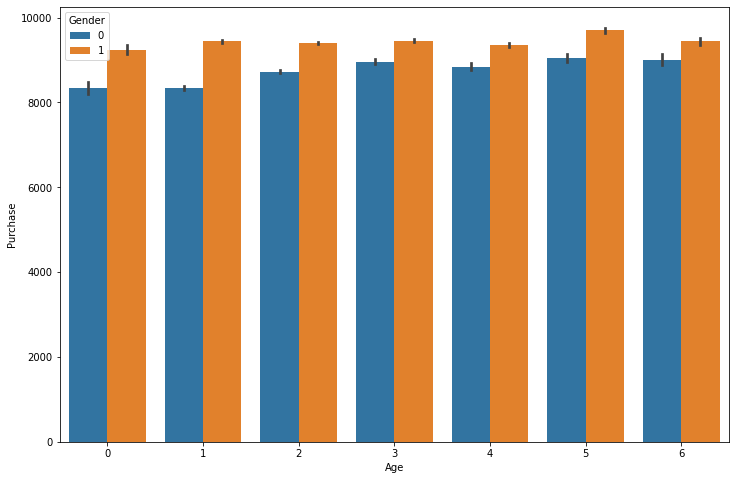

In [118]:
## Visualization 
#Visualizing purchase vs age groups on the basis of gender
plt.rcParams['figure.figsize'] = 12,8
sns.barplot(x='Age',y='Purchase',hue="Gender",data=df)

Observation:<br/>
1. All of the age groups have similar kind of purchases
2. Purchases by male is little higher than females in all the age groups 

<AxesSubplot:xlabel='Occupation', ylabel='Purchase'>

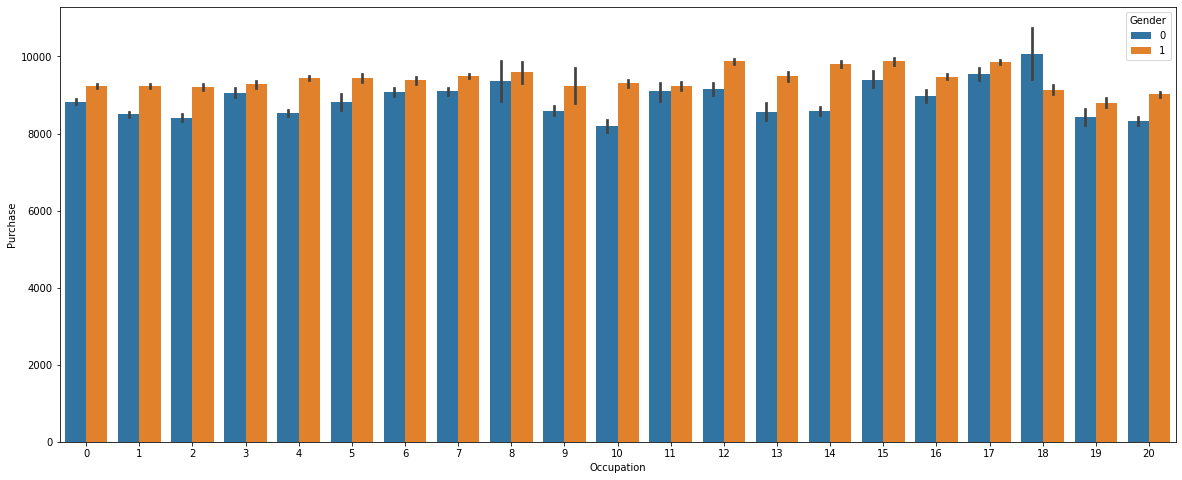

In [120]:
#Visualizing purchase vs occupation groups on the basis of gender
plt.rcParams['figure.figsize'] = 20,8
sns.barplot(x='Occupation',y='Purchase',hue="Gender",data=df)

<AxesSubplot:xlabel='Product_Category_1', ylabel='Purchase'>

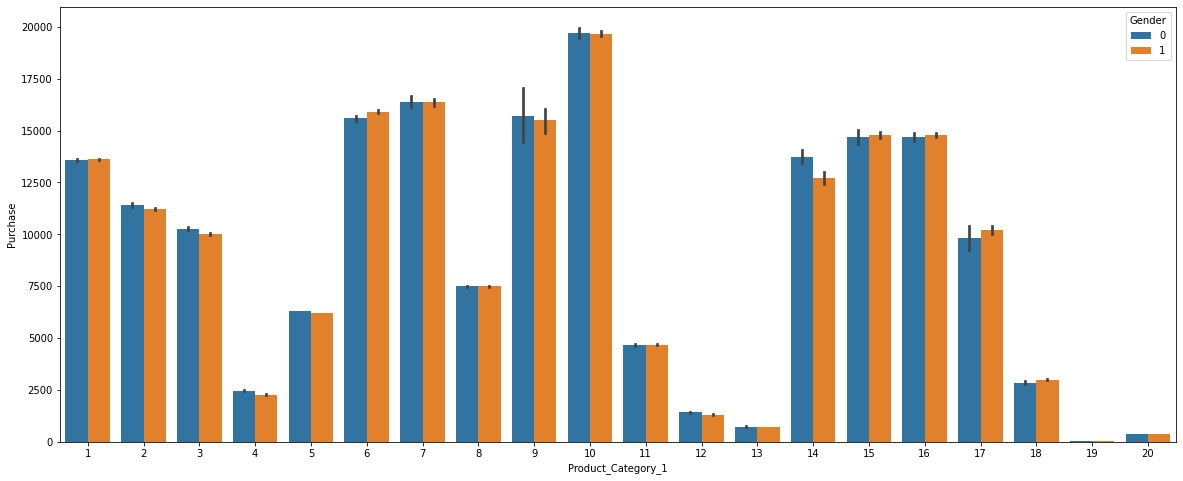

In [123]:
#Visualizing purchase of Product_Category_1 on the basis of gender
plt.rcParams['figure.figsize'] = 20,8
sns.barplot(x='Product_Category_1',y='Purchase',hue="Gender",data=df)

<AxesSubplot:xlabel='Product_Category_2', ylabel='Purchase'>

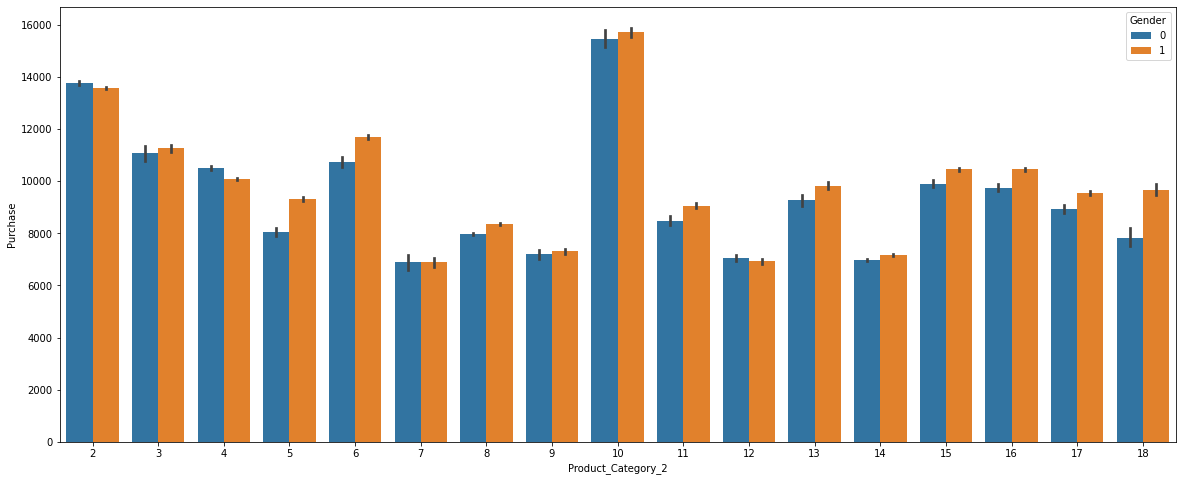

In [125]:
#Visualizing purchase of Product_Category_2 on the basis of gender
plt.rcParams['figure.figsize'] = 20,8
sns.barplot(x='Product_Category_2',y='Purchase',hue="Gender",data=df)

<AxesSubplot:xlabel='Product_Category_3', ylabel='Purchase'>

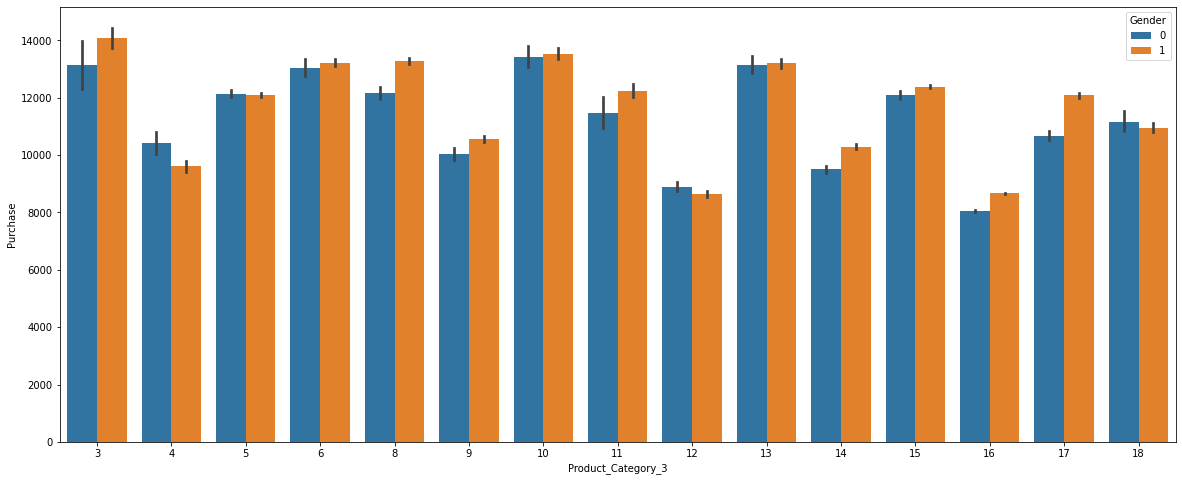

In [126]:
#Visualizing purchase of Product_Category_3 on the basis of gender
plt.rcParams['figure.figsize'] = 20,8
sns.barplot(x='Product_Category_3',y='Purchase',hue="Gender",data=df)

In [144]:
from sklearn.model_selection import train_test_split

# splitting into train and test
df_train = df[~df['Purchase'].isnull()].drop(['Product_ID'],axis=1)
df_test = df[df['Purchase'].isnull()].drop(['Purchase','Product_ID'],axis=1)

# split train into independent and dependent feature 
X = df_train.drop('Purchase',axis=1)
y = df_train['Purchase']

# splitting train to train and val
X_train,X_val,y_train,y_val = train_test_split(X,y,test_size=0.33,random_state=42)

In [147]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_val = sc.transform(X_val)

/workspace/EDA/venv/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
